In [52]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 데이터 쪼갤 때 필요
from sklearn.tree import DecisionTreeRegressor # 결정트리 회귀
from sklearn.tree import export_graphviz
import graphviz




#오늘도~ 화이팅!!!!#내일도~ 화이팅!!!!
#맨 마지막꺼 3개만 보면 되고 트리, 그래프 해석만 할 줄 알게


##중요 하이퍼 파라미터 각 모델별로 추가된거 잘 기억하기

# Decision Tree 
#1. min_samples_leaf, 2. min_samples_split, 3. max_depth

# Random Forest 
#1. min_samples_leaf, 2. min_samples_split, 3. max_depth + n_estimators(나무수)!!!!

# Grandient Boosting 
## 1. min_samples_leaf, 2. min_samples_split, 3. max_depth + n_estimators(나무수)! + learning_rate(학습률)!!!!



In [53]:
# import os
# os.environ["PATH"]+= os.pathsep +"/home/piai/anaconda3/lib/python3.8/site-packages/graphviz/"


%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [54]:
# 특정파일 읽어서 하라고 하면 여기에 경로 넣기!!!!!!!!!
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/체질검사.csv", engine='python',encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [55]:
df_raw_y = df_raw["FAT"] # 목표변수 FAT // 타겟변수 맞게 컬럼명 넣으면 됨!!!!

df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False) # 설명변수는 타겟변수 드랍하면 됩!!!!

# 트레인셋 나누기 0.7 대 0.3  임  
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)


# 만약 train:validation:test=0.4:0.3:0.3 인경우 아래꺼 사용
# df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
#                                                                ,test_size = 0.3, random_state = 1234)

# # 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
# df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
#                                                                ,test_size = 3/7, random_state = 1234)



In [56]:

# 하이퍼 파라미터 customize하기 전임 
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

DecisionTreeRegressor(random_state=1234)

In [57]:
# uncustomized된 모델을 그냥 넣어서 점수를 측정해본것임 
print("Score on traing set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on traing set:1.000
Score on test set:0.345


In [58]:
## 하이퍼 파라미터 조정 1단계 Min_sample_leaf임 모든 노드는 min_sample_leaf 이상의 샘플을 가지고 있어야함
# 즉 이 수보다 작게 쪼갤 수 없음

train_score = []; test_score=[] # for 구문을 돌리면서 파라미터 조정을 하는데 이때 점수를 넣게됨 최종적으로
                                #얘를 보고 그래프를 그림
    
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)] # 하이퍼파라미터의 범위를 조정하는것임 1~19까지 값이 들어감

for v_min_samples_leaf in para_leaf: #1~19 까지 들어가면서 min_sample_leaf를 변경해가면서 점수를 기록함
    tree = DecisionTreeRegressor(random_state=1234,
                                min_samples_leaf=v_min_samples_leaf)#조정할 하이퍼파라미터로 트리모델만듬
    
    tree.fit(df_train_x,df_train_y) #트레인 셋으로 학습시킴
    train_score.append(tree.score(df_train_x,df_train_y)) # 점수기록
    test_score.append(tree.score(df_test_x,df_test_y))# 점수 기록
    

    
df_score_leaf = pd.DataFrame() # 스코어를 출력하기 위해 데이터프레임 형식으로 만듬
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [59]:
df_score_leaf.round(3) # 이 데이터프레임을 보고 min_sample_node를 정할 수 있음


,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.345
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


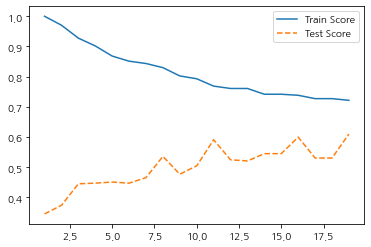

In [60]:
plt.plot(para_leaf,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_leaf,test_score,linestyle ='--', label = "Test Score")
plt.legend()# 위의 표를 그래프로 그린것임 이거보고 적당한 수를 정함

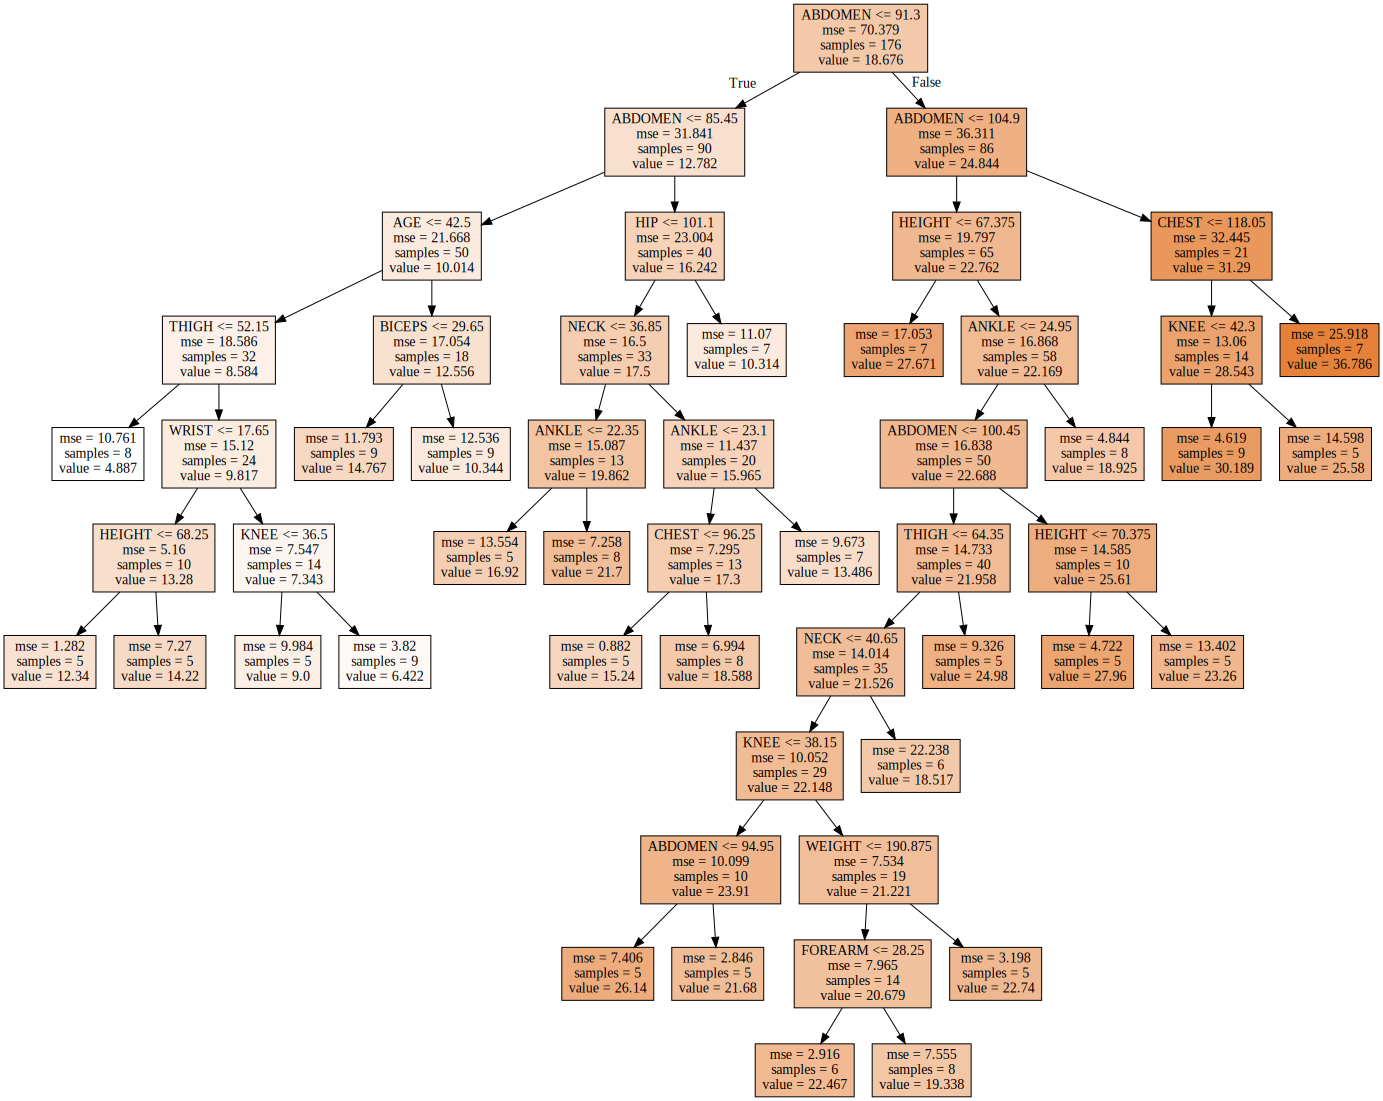

In [61]:
##이거는 위에서 찾아낸 min_sample_leaf를 적용해서 트리를 그리는 것임
# 트리를 해석할 때는 트리가 안정성있는지 확인해야함
# 좌우가 너무 불균형 하면 안정성이 있다고 하지않음 # 그렇다고 안좋다고 단정은 안함
# 마지막 노드 리프노드의 과소적합이 있다고 생각하면 더 쪼개면 됨
# 그래프보고 판단

v_feature_name = df_test_x.columns # feature 이름은 설명변수의 컬럼을 그대로 가져옴

tree_graph = DecisionTreeRegressor(random_state = 1234 , min_samples_leaf = 5) # 트리생성
tree_graph.fit(df_train_x, df_train_y) # 트리 학습
export_graphviz(tree_graph, out_file = "tree_leaf.dot",                # 트리를 그린 dot파일 생성
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf.dot") as f:  # 생성한 dot 파일 열기
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [62]:
#여기는 para_split을 정한거임 
#이거도 하이퍼파라미터의 범위를 정해 리스트에 넣고 for 구문을 반복하면서 점수를 구해
#그래프를 그리고 해석해서 적당한 값으로 정함

train_score = []; test_score=[]
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(min_samples_leaf=8
                                 ,random_state=1234,
                                min_samples_split=v_min_samples_split)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    

    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

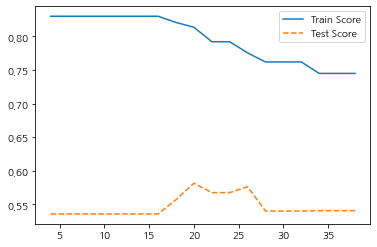

In [63]:
#여기도 그래프와 점수를 보고 split 값을 정하는 것임
# 나는 25정도가 적합하다고 생각(이거는 개인마다 다름)
df_score_split.round(3)

plt.plot(para_split,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_split,test_score,linestyle ='--', label = "Test Score")
plt.legend()

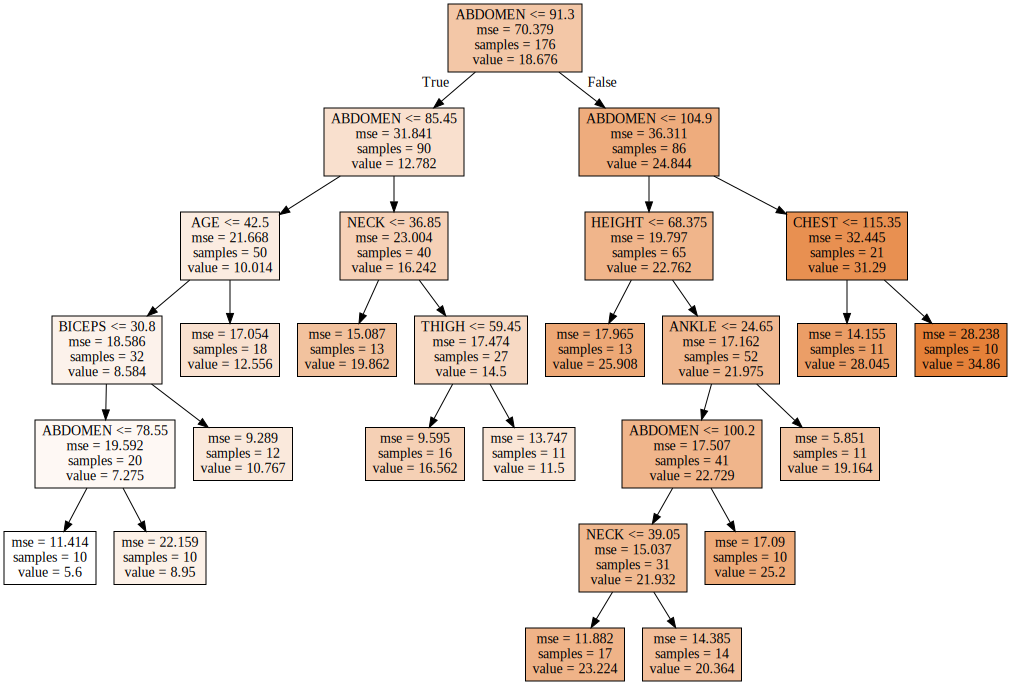

In [64]:
# 위에서 정한 split,leaf 값을 넣고 모델을 생성하여 그래프 그리기 설명 생략
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234 , min_samples_leaf = 10,min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_split.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [65]:
# depth 설정하는거임 설명 생략
train_score = []; test_score=[]
para_depth = [depth  for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(min_samples_leaf=8
                                 ,random_state=1234,
                                min_samples_split=20,
                                max_depth=v_max_depth)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

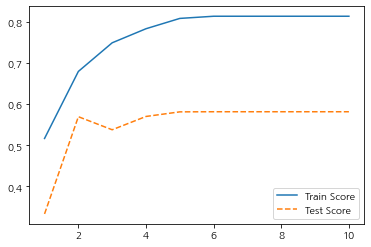

In [66]:

df_score_depth.round(3)

plt.plot(para_depth,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_depth,test_score,linestyle ='--', label = "Test Score")
plt.legend()

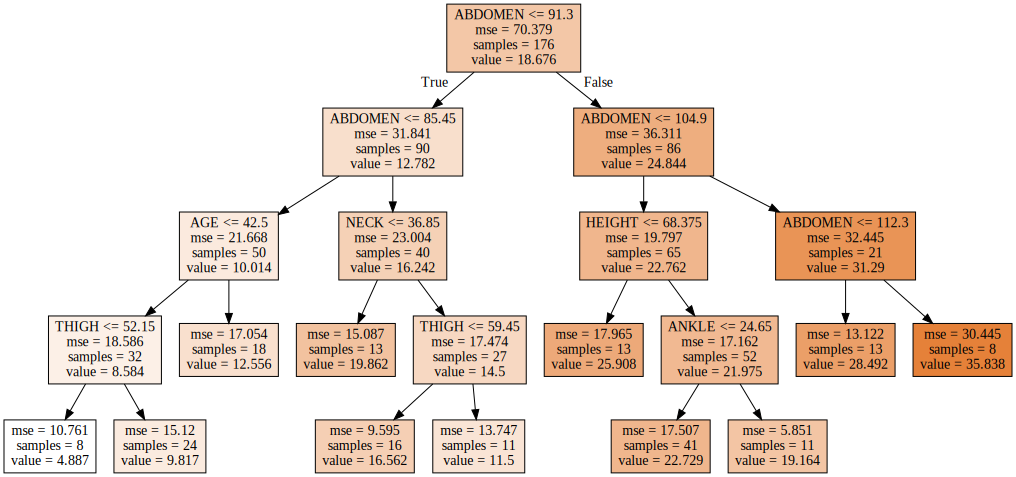

In [67]:
# 트리 그리기
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234 , min_samples_leaf = 8,
                                   min_samples_split=20,
                                   max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [68]:
####여기서 중요함 만약에 서술형에서 하이퍼 파라미터 값을 정해주고 final모델을 생성하라고 할 수 있음
####그렇게 문제가 나온다면 해야할 순서(전처리해야할거까진 내지않을듯 시간너무 걸림)
### 1.데이터 불러오기, 2.데이터나누기, 3.Final모델 생성하기, 4. 해석하기


# # 1. 데이터 불러오기
# df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/체질검사.csv", engine='python',encoding='cp949')
# df_raw.head()

###2. 데이터 나누기
# df_raw_y = df_raw["FAT"] # 목표변수 FAT // 타겟변수 맞게 컬럼명 넣으면 됨!!!!

# df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False) # 설명변수는 타겟변수 드랍하면 됩!!!!

# # 트레인셋 나누기 0.7 대 0.3  임  
# df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
#                                                                ,test_size = 0.3, random_state = 1234)


# # 만약 train:validation:test=0.4:0.3:0.3 인경우 아래꺼 사용
# # df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
# #                                                                ,test_size = 0.3, random_state = 1234)

# # # 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
# # df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
# #                                                                ,test_size = 3/7, random_state = 1234)



#3. Final모델 생성하기
tree_final = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split=20, max_depth=4, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

In [69]:
#####4. 생성한 모델 그리고 해석하기 
# 일단 importance 구하는 거임
# 크면 중요하다 -> 하지만 노드가 나뉘어지는 순서는 아니다.!!!! (보통 중요한걸로 먼저 나눔)
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)


,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

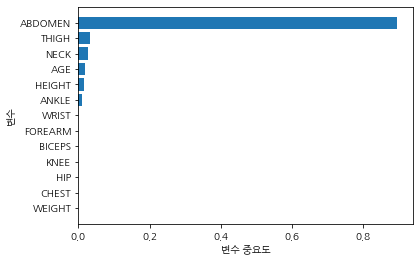

In [70]:
#위의 표를 그래프화 한거임 별거없음
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")